## load necessary packages ##

In [2]:
import pandas as pd
import numpy as np
import torch


## Load datasets ##

In [9]:
#transform the all the .txt data in order into a dataframe, all labels are 0 for this folder.
import os
import re

def load_data(path):
    data = []
    for file in os.listdir(path):
        if file.endswith('.txt'):
            with open(os.path.join(path, file), 'r') as f:
                text = f.read()
                data.append([file, text, 0])
    df = pd.DataFrame(data, columns=['file', 'text', 'label'])
    
    df = df.sort_values(by='file')
    return df
    

path = '/Users/richardzeng/Desktop/EMNLP/experiments/DementiaBank/Controls'
df_controls = load_data(path)
df_controls.head()

,file,text,label
90,002-0.txt,The scene is in the in the kitchen . The mothe...,0
77,002-1.txt,Oh I see the sink is running over . I see the ...,0
96,002-2.txt,Um a boy and a girl are in the kitchen with th...,0
112,002-3.txt,Okay . It was summertime and mother and the ch...,0
61,006-2.txt,Wait till I put my glasses on . Oh there's a g...,0


In [11]:
import os
import re

def load_data(path):
    data = []
    for file in os.listdir(path):
        if file.endswith('.txt'):
            with open(os.path.join(path, file), 'r') as f:
                text = f.read()
                data.append([file, text, 1])
    df = pd.DataFrame(data, columns=['file', 'text', 'label'])
    
    df = df.sort_values(by='file')
    return df
    

path = '/Users/richardzeng/Desktop/EMNLP/experiments/DementiaBank/Dementia'
df_dementia = load_data(path)
df_dementia.head()

,file,text,label
39,001-0.txt,Mhm . Alright . There's um a young boy that's ...,1
61,001-2.txt,Mhm . There's a young boy uh going in a cookie...,1
65,003-0.txt,Here's a cookie jar . And the lid is off the c...,1
30,005-0.txt,The boy is slipping off the stool . He's tryin...,1
4,005-2.txt,Okay he's falling off a chair . She's uh runni...,1


In [16]:
# combine the two dataframes
# Concatenate the two dataframes
df = pd.concat([df_controls, df_dementia])

# Shuffle the combined dataframe
df = df.sample(frac=1).reset_index(drop=True)

print(df.head(20))

         file                                               text  label
0   184-1.txt  Okay I see a boy in the cookie jar . I see he ...      1
1   092-0.txt  Drew's in the kitchen and mother is drying a d...      0
2   068-2.txt  Oh yes . Well uh the mother is washing the dis...      0
3   350-0.txt  Girl washing dishes . I see that . Uh what the...      1
4   306-0.txt  Whew . Uh do I have to use my my uh my persona...      1
5   114-0.txt  Uhhuh . All of the action . Well the little bo...      0
6   154-0.txt  Uh the boy is taking cookies out and giving th...      1
7   002-3.txt  Okay . It was summertime and mother and the ch...      0
8   465-0.txt  She's doing the dishes . He's on the cookie tr...      1
9   338-0.txt  Uh the water's overflowing in the sink . The w...      1
10  297-1.txt  Well there's a kid stealing cookies from the c...      0
11  344-0.txt  Well the guy's getting in the the boy's gettin...      1
12  229-1.txt  Okay . There's a child reaching for a cookie ....

## Exploratory data analysis ##

In [19]:
# check the label distribution
df['label'].value_counts()


label
1    310
0    241
Name: count, dtype: int64

In [20]:
df.groupby('label').describe().T

label                                                        0  \
file count                                                 241   
     unique                                                241   
     top                                             092-0.txt   
     freq                                                    1   
text count                                                 241   
     unique                                                240   
     top     Okay . Um you mean drying dishes . Uh overflow...   
     freq                                                    2   

label                                                        1  
file count                                                 310  
     unique                                                310  
     top                                             184-1.txt  
     freq                                                    1  
text count                                                 310  
     unique                                                310  
     top     Okay I see a boy in the cookie jar . I see he ...  
     freq                                                    1

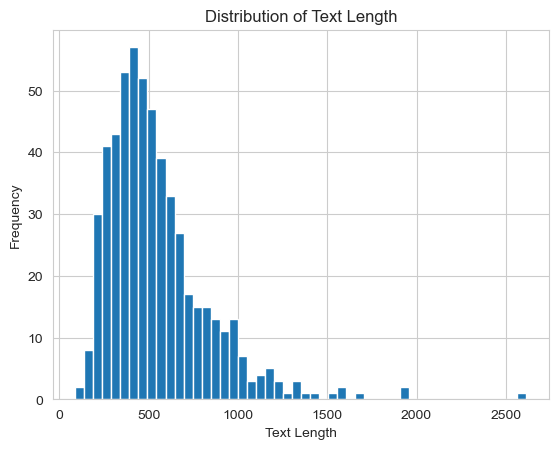

In [21]:
#plot the distribution of the text length
import matplotlib.pyplot as plt

df['text_length'] = df['text'].apply(len)
df['text_length'].plot(kind='hist', bins=50)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')

plt.show()


In [23]:
# check the average text length, min and max text length
df['text_length'].describe()


count     551.000000
mean      545.901996
std       286.728509
min        90.000000
25%       354.000000
50%       483.000000
75%       658.000000
max      2614.000000
Name: text_length, dtype: float64

In [28]:
df.sort_values(by=['text_length'], ascending=False).head(20)

,file,text,label,text_length
485,128-3.txt,Oh it's the same picture . You should give me ...,0,2614
284,128-2.txt,Oh I remember this one . This is great . Okay ...,0,1948
239,157-1.txt,This picture . Well there's a kid on a stool ....,1,1934
268,207-0.txt,Yes . The water . Well let's see . There's som...,1,1679
254,268-0.txt,The pearl mom's getting her wet feet wet becau...,1,1588
465,121-0.txt,Alright . The boy is taking a cookie out of th...,0,1557
303,029-1.txt,Alright . I see the little boy stealing cookie...,1,1507
469,243-0.txt,Okay the picture's in a kitchen uh with uh a f...,0,1450
69,076-2.txt,Oh my . You mean how much or just the ones . O...,1,1385
466,086-0.txt,Oh I was xxx . Oh this is going to be like loo...,0,1328


In [29]:
#remove the text length that is greater than 1000
df = df[df['text_length'] <= 1000]

#check the distribution of the label after removing the text length that is greater than 1000
df['label'].value_counts()

label
1    290
0    226
Name: count, dtype: int64

## Preprocessing ##

In [30]:
#train test split
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)



In [36]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load the dataset

# Define tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenize the text data
def tokenize_data(data, tokenizer, max_length=512):
    return tokenizer(
        data['text'].tolist(),
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

train_encodings = tokenize_data(train_data, tokenizer)
test_encodings = tokenize_data(test_data, tokenizer)

# Convert labels to tensor
train_labels = torch.tensor(train_data['label'].tolist())
test_labels = torch.tensor(test_data['label'].tolist())

# Create a dataset class
class PictureDescriptionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = PictureDescriptionDataset(train_encodings, train_labels)
test_dataset = PictureDescriptionDataset(test_encodings, test_labels)

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=20,
    learning_rate=0.00001,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=lambda p: {
        'accuracy': accuracy_score(p.label_ids, p.predictions.argmax(-1)),
        'precision': precision_recall_fscore_support(p.label_ids, p.predictions.argmax(-1), average='binary')[0],
        'recall': precision_recall_fscore_support(p.label_ids, p.predictions.argmax(-1), average='binary')[1],
        'f1': precision_recall_fscore_support(p.label_ids, p.predictions.argmax(-1), average='binary')[2],
    },
)

# Train the model
trainer.train()

# Evaluate the model
eval_result = trainer.evaluate()
print(f"Evaluation result: {eval_result}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/richardzeng/opt/anaconda3/envs/EMNLP/lib/python3.11/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/var/folders/l9/qqb85lxn7d38y07pzrx88zvw0000gn/T/ipykernel_55077/546552507.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508
3,0.680300,0.676871,0.574194,0.575163,0.988764,0.727273


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508
3,0.680300,0.676871,0.574194,0.575163,0.988764,0.727273
4,0.667400,0.667204,0.600000,0.590604,0.988764,0.739496


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508
3,0.680300,0.676871,0.574194,0.575163,0.988764,0.727273
4,0.667400,0.667204,0.600000,0.590604,0.988764,0.739496
5,0.644200,0.651714,0.651613,0.673267,0.764045,0.715789


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508
3,0.680300,0.676871,0.574194,0.575163,0.988764,0.727273
4,0.667400,0.667204,0.600000,0.590604,0.988764,0.739496
5,0.644200,0.651714,0.651613,0.673267,0.764045,0.715789
6,0.631300,0.620527,0.703226,0.741573,0.741573,0.741573


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508
3,0.680300,0.676871,0.574194,0.575163,0.988764,0.727273
4,0.667400,0.667204,0.600000,0.590604,0.988764,0.739496
5,0.644200,0.651714,0.651613,0.673267,0.764045,0.715789
6,0.631300,0.620527,0.703226,0.741573,0.741573,0.741573
7,0.555400,0.593138,0.683871,0.812500,0.584270,0.679739


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508
3,0.680300,0.676871,0.574194,0.575163,0.988764,0.727273
4,0.667400,0.667204,0.600000,0.590604,0.988764,0.739496
5,0.644200,0.651714,0.651613,0.673267,0.764045,0.715789
6,0.631300,0.620527,0.703226,0.741573,0.741573,0.741573
7,0.555400,0.593138,0.683871,0.812500,0.584270,0.679739
8,0.484400,0.555982,0.729032,0.805195,0.696629,0.746988


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508
3,0.680300,0.676871,0.574194,0.575163,0.988764,0.727273
4,0.667400,0.667204,0.600000,0.590604,0.988764,0.739496
5,0.644200,0.651714,0.651613,0.673267,0.764045,0.715789
6,0.631300,0.620527,0.703226,0.741573,0.741573,0.741573
7,0.555400,0.593138,0.683871,0.812500,0.584270,0.679739
8,0.484400,0.555982,0.729032,0.805195,0.696629,0.746988
9,0.478800,0.553012,0.709677,0.854839,0.595506,0.701987


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508
3,0.680300,0.676871,0.574194,0.575163,0.988764,0.727273
4,0.667400,0.667204,0.600000,0.590604,0.988764,0.739496
5,0.644200,0.651714,0.651613,0.673267,0.764045,0.715789
6,0.631300,0.620527,0.703226,0.741573,0.741573,0.741573
7,0.555400,0.593138,0.683871,0.812500,0.584270,0.679739
8,0.484400,0.555982,0.729032,0.805195,0.696629,0.746988
9,0.478800,0.553012,0.709677,0.854839,0.595506,0.701987
10,0.416400,0.556414,0.716129,0.868852,0.595506,0.706667


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508
3,0.680300,0.676871,0.574194,0.575163,0.988764,0.727273
4,0.667400,0.667204,0.600000,0.590604,0.988764,0.739496
5,0.644200,0.651714,0.651613,0.673267,0.764045,0.715789
6,0.631300,0.620527,0.703226,0.741573,0.741573,0.741573
7,0.555400,0.593138,0.683871,0.812500,0.584270,0.679739
8,0.484400,0.555982,0.729032,0.805195,0.696629,0.746988
9,0.478800,0.553012,0.709677,0.854839,0.595506,0.701987
10,0.416400,0.556414,0.716129,0.868852,0.595506,0.706667


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508
3,0.680300,0.676871,0.574194,0.575163,0.988764,0.727273
4,0.667400,0.667204,0.600000,0.590604,0.988764,0.739496
5,0.644200,0.651714,0.651613,0.673267,0.764045,0.715789
6,0.631300,0.620527,0.703226,0.741573,0.741573,0.741573
7,0.555400,0.593138,0.683871,0.812500,0.584270,0.679739
8,0.484400,0.555982,0.729032,0.805195,0.696629,0.746988
9,0.478800,0.553012,0.709677,0.854839,0.595506,0.701987
10,0.416400,0.556414,0.716129,0.868852,0.595506,0.706667


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508
3,0.680300,0.676871,0.574194,0.575163,0.988764,0.727273
4,0.667400,0.667204,0.600000,0.590604,0.988764,0.739496
5,0.644200,0.651714,0.651613,0.673267,0.764045,0.715789
6,0.631300,0.620527,0.703226,0.741573,0.741573,0.741573
7,0.555400,0.593138,0.683871,0.812500,0.584270,0.679739
8,0.484400,0.555982,0.729032,0.805195,0.696629,0.746988
9,0.478800,0.553012,0.709677,0.854839,0.595506,0.701987
10,0.416400,0.556414,0.716129,0.868852,0.595506,0.706667


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508
3,0.680300,0.676871,0.574194,0.575163,0.988764,0.727273
4,0.667400,0.667204,0.600000,0.590604,0.988764,0.739496
5,0.644200,0.651714,0.651613,0.673267,0.764045,0.715789
6,0.631300,0.620527,0.703226,0.741573,0.741573,0.741573
7,0.555400,0.593138,0.683871,0.812500,0.584270,0.679739
8,0.484400,0.555982,0.729032,0.805195,0.696629,0.746988
9,0.478800,0.553012,0.709677,0.854839,0.595506,0.701987
10,0.416400,0.556414,0.716129,0.868852,0.595506,0.706667


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508
3,0.680300,0.676871,0.574194,0.575163,0.988764,0.727273
4,0.667400,0.667204,0.600000,0.590604,0.988764,0.739496
5,0.644200,0.651714,0.651613,0.673267,0.764045,0.715789
6,0.631300,0.620527,0.703226,0.741573,0.741573,0.741573
7,0.555400,0.593138,0.683871,0.812500,0.584270,0.679739
8,0.484400,0.555982,0.729032,0.805195,0.696629,0.746988
9,0.478800,0.553012,0.709677,0.854839,0.595506,0.701987
10,0.416400,0.556414,0.716129,0.868852,0.595506,0.706667


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508
3,0.680300,0.676871,0.574194,0.575163,0.988764,0.727273
4,0.667400,0.667204,0.600000,0.590604,0.988764,0.739496
5,0.644200,0.651714,0.651613,0.673267,0.764045,0.715789
6,0.631300,0.620527,0.703226,0.741573,0.741573,0.741573
7,0.555400,0.593138,0.683871,0.812500,0.584270,0.679739
8,0.484400,0.555982,0.729032,0.805195,0.696629,0.746988
9,0.478800,0.553012,0.709677,0.854839,0.595506,0.701987
10,0.416400,0.556414,0.716129,0.868852,0.595506,0.706667


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508
3,0.680300,0.676871,0.574194,0.575163,0.988764,0.727273
4,0.667400,0.667204,0.600000,0.590604,0.988764,0.739496
5,0.644200,0.651714,0.651613,0.673267,0.764045,0.715789
6,0.631300,0.620527,0.703226,0.741573,0.741573,0.741573
7,0.555400,0.593138,0.683871,0.812500,0.584270,0.679739
8,0.484400,0.555982,0.729032,0.805195,0.696629,0.746988
9,0.478800,0.553012,0.709677,0.854839,0.595506,0.701987
10,0.416400,0.556414,0.716129,0.868852,0.595506,0.706667


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508
3,0.680300,0.676871,0.574194,0.575163,0.988764,0.727273
4,0.667400,0.667204,0.600000,0.590604,0.988764,0.739496
5,0.644200,0.651714,0.651613,0.673267,0.764045,0.715789
6,0.631300,0.620527,0.703226,0.741573,0.741573,0.741573
7,0.555400,0.593138,0.683871,0.812500,0.584270,0.679739
8,0.484400,0.555982,0.729032,0.805195,0.696629,0.746988
9,0.478800,0.553012,0.709677,0.854839,0.595506,0.701987
10,0.416400,0.556414,0.716129,0.868852,0.595506,0.706667


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508
3,0.680300,0.676871,0.574194,0.575163,0.988764,0.727273
4,0.667400,0.667204,0.600000,0.590604,0.988764,0.739496
5,0.644200,0.651714,0.651613,0.673267,0.764045,0.715789
6,0.631300,0.620527,0.703226,0.741573,0.741573,0.741573
7,0.555400,0.593138,0.683871,0.812500,0.584270,0.679739
8,0.484400,0.555982,0.729032,0.805195,0.696629,0.746988
9,0.478800,0.553012,0.709677,0.854839,0.595506,0.701987
10,0.416400,0.556414,0.716129,0.868852,0.595506,0.706667


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.693400,0.685926,0.574194,0.574194,1.000000,0.729508
2,0.683900,0.682431,0.574194,0.574194,1.000000,0.729508
3,0.680300,0.676871,0.574194,0.575163,0.988764,0.727273
4,0.667400,0.667204,0.600000,0.590604,0.988764,0.739496
5,0.644200,0.651714,0.651613,0.673267,0.764045,0.715789
6,0.631300,0.620527,0.703226,0.741573,0.741573,0.741573
7,0.555400,0.593138,0.683871,0.812500,0.584270,0.679739
8,0.484400,0.555982,0.729032,0.805195,0.696629,0.746988
9,0.478800,0.553012,0.709677,0.854839,0.595506,0.701987
10,0.416400,0.556414,0.716129,0.868852,0.595506,0.706667


/var/folders/l9/qqb85lxn7d38y07pzrx88zvw0000gn/T/ipykernel_55077/546552507.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Evaluation result: {'eval_loss': 1.1070233583450317, 'eval_accuracy': 0.7612903225806451, 'eval_precision': 0.825, 'eval_recall': 0.7415730337078652, 'eval_f1': 0.7810650887573964, 'eval_runtime': 3.7227, 'eval_samples_per_second': 41.636, 'eval_steps_per_second': 2.686, 'epoch': 20.0}
